<a href="https://colab.research.google.com/github/SKYUTS/MachineLearning-AI-/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
# load the dataset
X, y = make_classification(n_samples=1000, n_features=50, n_informative=10, n_redundant=5, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a random forest classifier with 3 trees
rf = RandomForestClassifier(n_estimators=3, max_depth=3, max_features=10, random_state=12, max_samples=0.8)

# fit the random forest on the training dataset
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_features=10, max_samples=0.8,
                       n_estimators=3, random_state=12)

Tree 1: 640.0 data in root node
Tree 2: 640.0 data in root node
Tree 3: 640.0 data in root node


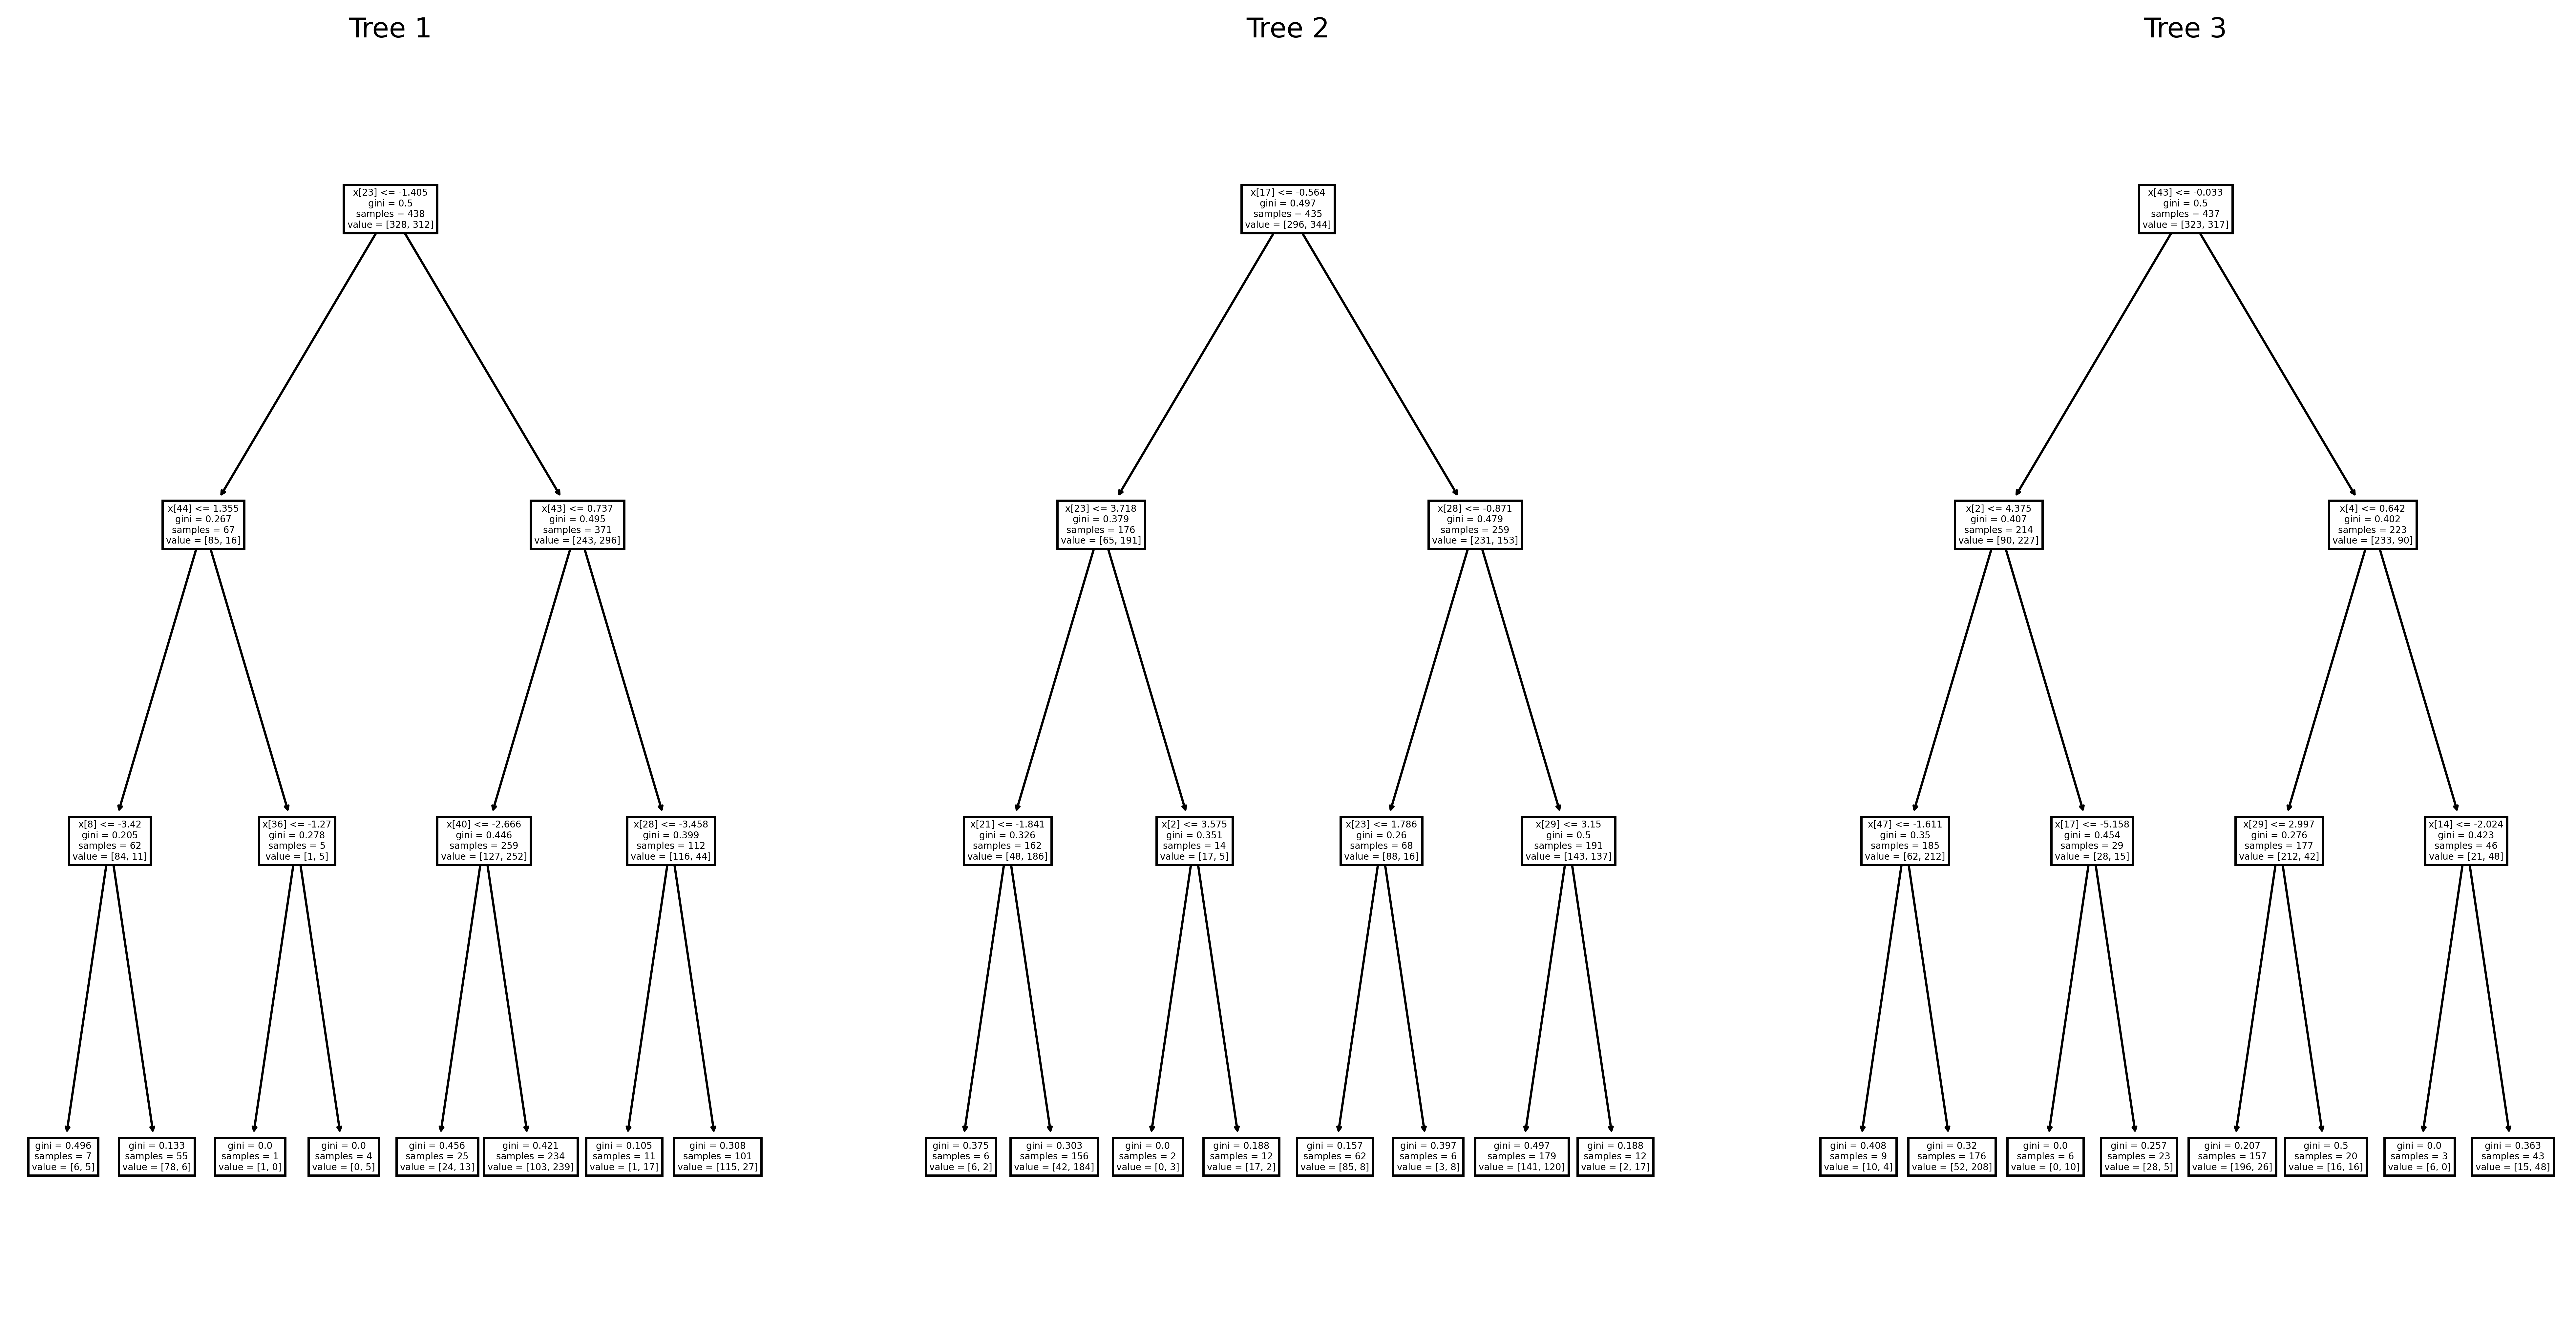

In [ ]:
# visualize each tree in the forest
fig, axes = plt.subplots(nrows=1, ncols=len(rf.estimators_), figsize=(20, 10), dpi=500)
for i, tree in enumerate(rf.estimators_):
    print(f"Tree {i+1}: {tree.tree_.value[0].sum()} data in root node")

    plot_tree(tree, ax=axes[i])
    axes[i].set_title(f"Tree {i+1}")
plt.show()

### The numbers 438, 435, and 437 that you see in the root nodes represent the total number of unique samples in each tree.
### This is because bootstrapping is performed with replacement, meaning some samples may be drawn more than once, while others may not be drawn at all.

In [ ]:
# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.74
